### Exercise:
Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
5,1170,2,38.0
9,3700,5,167.0
10,1800,3,82.0
3,1521,3,75.0
11,2785,4,140.0


In [4]:
# Check missing values (if any)
df.isna().sum()

area        0
bedrooms    0
price       0
dtype: int64

In [5]:
# Handle missing values (if any)
df.fillna(df.median(), inplace=True)


In [7]:
# Extract features (X) and target (y)
X = df[['area', 'bedrooms']].values  # Independent variables
y = df['price'].values.reshape(-1, 1)  # Dependent variable (reshaped to column vector)

In [ ]:
# Feature scaling (Normalization)
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [9]:
# Add bias term (intercept) -> Convert X to [1, x1, x2]
X = np.c_[np.ones(X.shape[0]), X]

In [10]:
# Initialize weights (theta)
theta = np.random.randn(X.shape[1], 1)

In [11]:
# Hyperparameters
learning_rate = 0.01
epochs = 200
batch_size = 10  # Mini-batch size
m = len(y)  # Total samples

In [12]:
# Store cost for visualization
cost_history = []

In [13]:
# Mini-Batch Gradient Descent
for epoch in range(epochs):
    indices = np.random.permutation(m)  # Shuffle data
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(0, m, batch_size):
        X_batch = X_shuffled[i:i + batch_size]
        y_batch = y_shuffled[i:i + batch_size]

        # Compute predictions
        y_pred = X_batch.dot(theta)

        # Compute error
        error = y_pred - y_batch

        # Compute gradients
        gradients = (1 / batch_size) * X_batch.T.dot(error)

        # Update weights
        theta -= learning_rate * gradients

    # Compute overall cost (Mean Squared Error) for monitoring
    total_error = X.dot(theta) - y
    cost = (1 / (2 * m)) * np.sum(total_error ** 2)
    cost_history.append(cost)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")

# Final Model Parameters
print("\nFinal Weights (Theta):")
print(theta)

Epoch 0, Cost: 3823.0702
Epoch 20, Cost: 1554.6025
Epoch 40, Cost: 680.3601
Epoch 60, Cost: 319.1303
Epoch 80, Cost: 163.4872
Epoch 100, Cost: 94.6052
Epoch 120, Cost: 63.4920
Epoch 140, Cost: 49.0756
Epoch 160, Cost: 42.1167
Epoch 180, Cost: 38.5386

Final Weights (Theta):
[[77.44058503]
 [26.97897296]
 [15.6341398 ]]


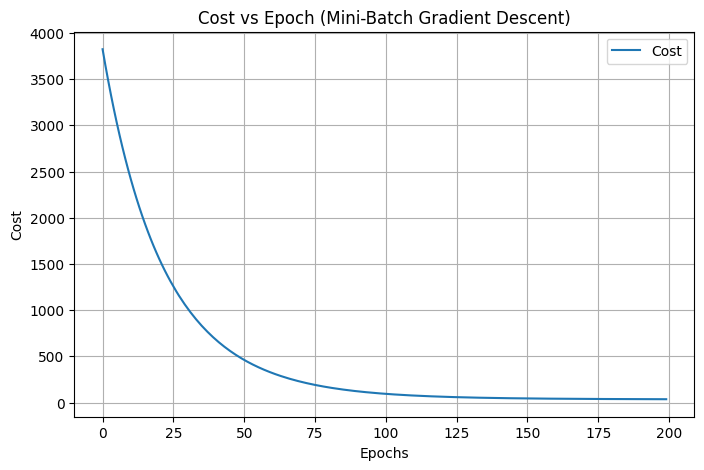

In [14]:
# Plot Cost vs Epoch
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, label='Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epoch (Mini-Batch Gradient Descent)')
plt.legend()
plt.grid()
plt.show()